# Chapter 3

## 状態空間モデルの記述

In [1]:
from control.matlab import ss, ssdata


状態空間モデルの記述は，ssを用います

行列A, B, C, Dは，array_like data (リスト）か string（文字列）で記述します

In [2]:
# array_like data
A = [ [0, 1], [-1, -1] ]
B = [ [0], [1] ]
C = [ 1, 0 ]
D = [ 0 ]
P = ss(A, B, C, D)
print(P)


<LinearIOSystem>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [-1. -1.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]



In [3]:
# string (ver.0.10.0から非対応)
# A = '0 1; -1 -1'
# B = '0; 1'
# C = '1 0'
# D = '0'
# P = ss(A, B, C, D)
# print(P)

### 練習問題

In [4]:
# A = '1 1 2; 2 1 1; 3 4 5'
# B = '2; 0; 1'
# C = '1 1 0'
# D = '0'

A = [[1, 1, 2], [2, 1, 1], [3, 4, 5]]
B = [[2], [0], [1]]
C = [1, 1, 0]
D = [0]
P = ss(A, B, C, D)
print(P)

<LinearIOSystem>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[1. 1. 2.]
     [2. 1. 1.]
     [3. 4. 5.]]

B = [[2.]
     [0.]
     [1.]]

C = [[1. 1. 0.]]

D = [[0.]]



### A,B,C,D行列の抽出

In [5]:
print('A=', P.A)
print('B=', P.B)
print('C=', P.C)
print('D=', P.D)


A= [[1. 1. 2.]
 [2. 1. 1.]
 [3. 4. 5.]]
B= [[2.]
 [0.]
 [1.]]
C= [[1. 1. 0.]]
D= [[0.]]


In [6]:
sysA, sysB, sysC, sysD = ssdata(P)
print('A=', sysA)
print('B=', sysB)
print('C=', sysC)
print('D=', sysD)


A= [[1. 1. 2.]
 [2. 1. 1.]
 [3. 4. 5.]]
B= [[2.]
 [0.]
 [1.]]
C= [[1. 1. 0.]]
D= [[0.]]


## 伝達関数モデルの記述

In [7]:
from control.matlab import tf, tfdata


伝達関数モデルの記述は，tfを用います

In [8]:
Np = [0, 1]      # 伝達関数の分子多項式(0*s + 1)の係数
Dp = [1, 2, 3]   # 伝達関数の分母多項式(1*s^2 + 2*s + 3)の係数
P = tf(Np, Dp)
print('P(s)=', P)


P(s)= 
      1
-------------
s^2 + 2 s + 3



In [9]:
P = tf([0, 1], [1, 2, 3])
print('P(s)=', P)


P(s)= 
      1
-------------
s^2 + 2 s + 3



ラプラス演算子を定義して記述することもできます

In [10]:
s = tf('s')
P = 1/(s**2 + 2*s + 3)
print('P(s)=', P)


P(s)= 
      1
-------------
s^2 + 2 s + 3



### 練習問題

In [11]:
P = tf([1, 2], [1, 5, 3, 4])
P


TransferFunction(array([1, 2]), array([1, 5, 3, 4]))

分母多項式の展開

In [12]:
import sympy as sp
sp.init_printing()

s = sp.Symbol('s')
sp.expand( (s+1)*(s+2)**2, s)


In [13]:
P = tf([1, 3],[1, 5, 8, 4])
P


TransferFunction(array([1, 3]), array([1, 5, 8, 4]))

In [14]:
P1 = tf([1, 3], [0, 1]) # (s+3)/1
P2 = tf([0, 1], [1, 1]) # 1/(s+1)
P3 = tf([0, 1], [1, 2]) # 1/(s+2)
P = P1 * P2 * P3**2
P


TransferFunction(array([1, 3]), array([1, 5, 8, 4]))

In [15]:
s = tf('s')
P = (s+3)/((s+1)*(s+2)**2)
P


TransferFunction(array([1, 3]), array([1, 5, 8, 4]))

### 分母・分子多項式の係数の抽出

In [16]:
print(P.num)
print(P.den)


[[array([1, 3])]]
[[array([1, 5, 8, 4])]]


In [17]:
[[numP]], [[denP]] = tfdata(P)
print(numP)
print(denP)


[1 3]
[1 5 8 4]


## モデルの変換

In [18]:
from control.matlab import tf, tf2ss, ss2tf

P = tf( [0, 1], [1, 1, 1])

Pss = tf2ss(P) # 伝達関数モデルから状態空間モデルへの変換
print(Pss)
Ptf = ss2tf(Pss) # 状態空間モデルから伝達関数モデルへの変換
print(Ptf)


A = [[-1. -1.]
     [ 1.  0.]]

B = [[-1.]
     [ 0.]]

C = [[ 0. -1.]]

D = [[0.]]


     1
-----------
s^2 + s + 1



### 可制御正準形

正準形への変換は，controlのcanonikcal_formを使います（control.matlabには関数がありません）

In [19]:
from control import ss, canonical_form

# A = '1 2 3; 3 2 1; 4 5 0'
# B = '1; 0; 1'
# C = '0 2 1'
# D = '0'

A = [[1, 2, 3], [3, 2, 1], [4, 5, 0]]
B = [[1], [0], [1]]
C = [0, 2, 1]
D = [0]
Pss = ss(A, B, C, D)

Pr, T = canonical_form(Pss, form='reachable')
print(Pr)

A = [[ 3. 21. 24.]
     [ 1.  0.  0.]
     [ 0.  1.  0.]]

B = [[1.]
     [0.]
     [0.]]

C = [[ 1.  9. 27.]]

D = [[0.]]



等価変換の行列は T です

In [20]:
print(T)


[[-5.55111512e-16 -2.50000000e-01  1.00000000e+00]
 [ 2.50000000e-01  2.50000000e-01 -2.50000000e-01]
 [-8.33333333e-02 -0.00000000e+00  8.33333333e-02]]


### 可観測正準形

In [21]:
Pr, T = canonical_form(Pss, form='observable')
print(Pr)
print(T)


A = [[ 3.  1.  0.]
     [21.  0.  1.]
     [24.  0.  0.]]

B = [[ 1.]
     [ 9.]
     [27.]]

C = [[1. 0. 0.]]

D = [[0.]]

[[ 1.18423789e-16  2.00000000e+00  1.00000000e+00]
 [ 1.00000000e+01  3.00000000e+00 -1.00000000e+00]
 [ 1.50000000e+01 -2.10000000e+01  1.20000000e+01]]


## ブロック線図の結合

In [22]:
from control.matlab import tf, ss, series, parallel, feedback


In [23]:
S1 = tf( [0, 1], [1, 1])
S2 = tf( [1, 1], [1, 1, 1] )
print(S1)
print(S2)



  1
-----
s + 1


   s + 1
-----------
s^2 + s + 1



### 直列結合

In [24]:
S = S2 * S1
print('S=', S)

S = series(S1, S2)
print('S=', S)


S= 
        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1



分母分子の共通因子 s+1 が約分されません。

この場合は，minreal を使います。minreal は不可制御，不可観測なモードの削除（最小実現）をするものです。

In [25]:
print('S=', S.minreal())


S= 
     1
-----------
s^2 + s + 1



あるいは，状態空間モデルに変換してから結合する

In [26]:
S1ss = ss(S1) # 状態空間モデルへの変換
S2ss = ss(S2) # 状態空間モデルへの変換

S = S1ss * S2ss
print(tf(S))
S = series(S1ss, S2ss)
print(tf(S))



     1
-----------
s^2 + s + 1


     1
-----------
s^2 + s + 1



### 並列結合

In [27]:
S = S1 + S2
print('S=', S)
S = parallel(S1, S2)
print('S=', S)


S= 
   2 s^2 + 3 s + 2
---------------------
s^3 + 2 s^2 + 2 s + 1

S= 
   2 s^2 + 3 s + 2
---------------------
s^3 + 2 s^2 + 2 s + 1



### フィードバック結合

In [28]:
S = S1 / (1 + S1*S2)
print('S=', S)
S = feedback(S1, S2)
print('S=', S)


S= 
    s^3 + 2 s^2 + 2 s + 1
-----------------------------
s^4 + 3 s^3 + 5 s^2 + 5 s + 2

S= 
     s^2 + s + 1
---------------------
s^3 + 2 s^2 + 3 s + 2



In [29]:
print('S=', S.minreal())


S= 
     s^2 + s + 1
---------------------
s^3 + 2 s^2 + 3 s + 2



In [30]:
S = S1*S2 / (1 + S1*S2)
print('S=', S)
S = feedback(S1*S2, 1)
print('S=', S)


S= 
         s^4 + 3 s^3 + 4 s^2 + 3 s + 1
-----------------------------------------------
s^6 + 4 s^5 + 9 s^4 + 13 s^3 + 12 s^2 + 7 s + 2

S= 
        s + 1
---------------------
s^3 + 2 s^2 + 3 s + 2



In [31]:
print('S=', S.minreal())


S= 
     1
-----------
s^2 + s + 2



ポジティブフィードバックの場合

In [32]:
S = feedback(S1*S2, 1, sign = 1)
print(S.minreal())



   1
-------
s^2 + s



### 練習問題

In [33]:
S1 = tf(1, [1, 1])
S2 = tf(1, [1, 2])
S3 = tf([3, 1], [1, 0])
S4 = tf([2, 0], [0, 1])

print('S1=', S1)
print('S2=', S2)
print('S3=', S3)
print('S4=', S4)

S12 = feedback(S1, S2)
S123 = series(S12, S3)
S = feedback(S123, S4)
print('S=', S)


S1= 
  1
-----
s + 1

S2= 
  1
-----
s + 2

S3= 
3 s + 1
-------
   s

S4= 
2 s
---
 1

S= 
  3 s^2 + 7 s + 2
--------------------
7 s^3 + 17 s^2 + 7 s



## プロパー性

In [34]:
from control.matlab import tf, tf2ss

S1 = tf([1, 1], [0, 1])
S2 = tf([0, 1], [1, 1])

S = series(S1, S2)
print(S.minreal())



1
-
1



厳密にプロパー

In [35]:
print(S2)
tf2ss(S2)



  1
-----
s + 1



StateSpace(array([[-1.]]), array([[1.]]), array([[1.]]), array([[0.]]))

インプロパー

In [36]:
print(S1)
# tf2ss(S1) # 状態方程式に変換できない



s + 1
-----
  1



プロパー

In [37]:
S3 = tf([1, 2], [1, 1])
print(S3)
tf2ss(S3)



s + 2
-----
s + 1



StateSpace(array([[-1.]]), array([[1.]]), array([[1.]]), array([[1.]]))

## ラプラス変換

In [38]:
import sympy as sp


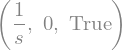

In [39]:
s = sp.Symbol('s')
t = sp.Symbol('t', positive=True)
sp.init_printing()
sp.laplace_transform(1, t, s)


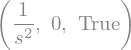

In [40]:
sp.laplace_transform(t, t, s)


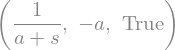

In [41]:
a = sp.Symbol('a', real=True)
sp.laplace_transform(sp.exp(-a*t), t, s)


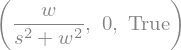

In [42]:
w = sp.Symbol('w', real=True)
sp.laplace_transform(sp.sin(w*t), t, s)


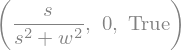

In [43]:
sp.laplace_transform(sp.cos(w*t), t, s)


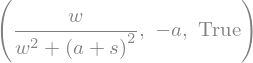

In [44]:
sp.laplace_transform(sp.exp(-a*t)*sp.sin(w*t), t, s)


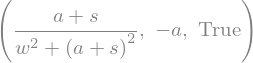

In [45]:
sp.laplace_transform(sp.exp(-a*t)*sp.cos(w*t), t, s)


## 逆ラプラス変換

In [46]:
sp.inverse_laplace_transform(1/s, s, t)


In [47]:
sp.inverse_laplace_transform(1/s**2, s, t)


In [48]:
sp.inverse_laplace_transform(1/(s+a), s, t)


In [49]:
sp.inverse_laplace_transform(w/(s**2+w**2), s, t)


In [50]:
sp.inverse_laplace_transform(s/(s**2+w**2), s, t)


In [51]:
sp.inverse_laplace_transform(w/((s+a)**2+w**2), s, t)


In [52]:
sp.inverse_laplace_transform((s+a)/((s+a)**2+w**2), s, t)


In [53]:
sp.inverse_laplace_transform(1/s, s, t)


In [54]:
sp.inverse_laplace_transform(1/s**2, s, t)


In [55]:
sp.inverse_laplace_transform(1/(s+a), s, t)


In [56]:
sp.inverse_laplace_transform(w/(s**2+w**2), s, t)


In [57]:
sp.inverse_laplace_transform(s/(s**2+w**2), s, t)


In [58]:
sp.inverse_laplace_transform(w/((s+a)**2+w**2), s, t)


In [59]:
sp.inverse_laplace_transform((s+a)/((s+a)**2+w**2), s, t)
